<a href="https://colab.research.google.com/github/quantwav/lab3/blob/main/lab3_3_16_18_46.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook setup**

In [1]:
%matplotlib inline
# Use %matplotlib ipympl or %matplotlib widget if you want interactive matplotlib plots
#%matplotlib widget

# reloads modules automatically before entering the execution of code typed at the IPython prompt
%load_ext autoreload
%autoreload 2

In [2]:
# Package Imports
!pip install linearmodels
import linearmodels as lm  #for panel data econometrics
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys
import time
import os

# To display dataframes as interactive tables in the notebook:
!pip install itables
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

# Add current directory to access common code in dp.py
#sys.path.insert(0, '/Users/mrrobert/Dropbox/mrrobert/Data')
#sys.path.insert(0, '.')

#import data_paths as dp

# Tolerance for tests
TOL = 1.0e-8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.9 MB/s eta 0:00:00


In [3]:
if not os.path.exists("20-indigo-acquisition-txn_item.pq"):
    !gdown 1HPnzTjUoXutjjuvBc8_61oUfyzd5yuBy
if not os.path.exists("20-indigo-acquisition-customer.pq"):
    !gdown 1hsHWmJC3yaUat7IuHNd9L05eIPcpYBLR
if not os.path.exists("20-indigo-acquisition-product.pq"):
    !gdown 1VrumXDjZ_z83-_lpx0JsFz4azZf7uCxU

Downloading...
From: https://drive.google.com/uc?id=1HPnzTjUoXutjjuvBc8_61oUfyzd5yuBy
To: /content/20-indigo-acquisition-txn_item.pq
100% 44.7M/44.7M [00:00<00:00, 137MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hsHWmJC3yaUat7IuHNd9L05eIPcpYBLR
To: /content/20-indigo-acquisition-customer.pq
100% 1.38M/1.38M [00:00<00:00, 55.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VrumXDjZ_z83-_lpx0JsFz4azZf7uCxU
To: /content/20-indigo-acquisition-product.pq
100% 1.71M/1.71M [00:00<00:00, 19.5MB/s]


In [4]:
df_raw_t = (
    pd
    .read_parquet('20-indigo-acquisition-txn_item.pq')
    # .drop(columns=['sich']) #you want to drop the column "SICH" because it has only missing values
)

df_raw_c = (
    pd
    .read_parquet('20-indigo-acquisition-customer.pq')
    # .drop(columns=['sich']) #you want to drop the column "SICH" because it has only missing values
)

df_raw_p = (
     pd
     .read_parquet('20-indigo-acquisition-product.pq')
    # .drop(columns=['sich']) #you want to drop the column "SICH" because it has only missing values
)


In [5]:
df_raw_c

customer_id cohort_date
0             72021  2013-03-27
1             74273  2015-03-18
2            200269  2015-05-21
3            109737  2010-10-04
4            272410  2014-11-19
...             ...         ...
172465       302850  2009-06-15
172466       224638  2010-09-27
172467       407789  2015-12-03
172468       297512  2011-10-23
172469       224583  2015-09-12

[172470 rows x 2 columns]

In [6]:
df_raw_p

product_id   category subcategory    gender     color
0               53       home      texbed   Unknown     White
1              255    fashion      uppers  Children    orange
2              481  accessory    jewelery     Woman  Rosegold
3              588      sport  sbaselayer       Man      Blue
4              799    fashion     bottoms  Children      Blue
...            ...        ...         ...       ...       ...
189582      207263    fashion    trousers     Woman      Pink
189583      207287    fashion    trousers     Woman     Black
189584      207553  accessory        bags     Woman      Grey
189585      207592    fashion         NaN     Woman      Blue
189586      208145    fashion    t-shirts     Woman      Grey

[189587 rows x 5 columns]

In [7]:
df_raw_t

transaction_id       date  product_id  customer_id  amount_spent  \
0                198339 2016-02-19         NaN       271393     21.511879   
1                165872 2018-01-01         NaN       397887      2.505400   
2                280805 2016-07-06         NaN         7298      5.097192   
3                  1247 2018-01-24    194975.0       373456     13.639168   
4                140861 2016-08-09     33206.0       264793     17.192225   
...                 ...        ...         ...          ...           ...   
2380864          662401 2017-06-23    186394.0        67953     60.388769   
2380865          588177 2016-05-20    104642.0       369112     43.110151   
2380866          233743 2015-03-24         NaN       404948     60.388769   
2380868          522335 2015-09-10         NaN        76400     43.110151   
2380869          193246 2017-07-15    129818.0       274988     61.354989   

         amount_returned  
0               4.211371  
1               2.505400  
2               1.040896  
3               0.000000  
4               4.199028  
...                  ...  
2380864         0.000000  
2380865        10.529222  
2380866        11.822300  
2380868         8.439665  
2380869         0.000000  

[2224421 rows x 6 columns]

# **Problem 1**

## **Potential costs and benefits of the acquisition for Cobalt and Indigo**:
### **Benefits for Cobalt**: Acquiring Indigo would allow Cobalt to rapidly expand its online presence and customer base, especially on the coasts where Indigo is strong. It could leverage Indigo's e-commerce capabilities.
### **Costs for Cobalt**: The acquisition price, integration costs of merging the businesses.
### **Benefits for Indigo**: Ability to scale by leveraging Cobalt's resources, supply chain, distribution network.
### **Costs for Indigo**: Potential culture clash, loss of independence/entrepreneurial spirit. Cobalt is essentially purchasing Indigo's online business, customer base, brand reputation, and e-commerce capabilities.

# **Problem 2**




### 2a. Potential Limitations of the Data
- Lack of customer demographic information (age, gender, location etc.) to better understand the customer base
- No marketing data on customer acquisition sources, campaigns etc.
- Limited product information - no details on pricing, margins, inventory levels
- No data on website traffic, conversion rates, marketing spend
However, the transactional data should allow understanding core operational metrics and customer behavior patterns.

### 2b. Suggested Order of Analysis
i. **Calculate overall metrics** like total customers, revenue, new customers/revenue by month to get a sense of scale and growth

ii. **Analyze customer behavior metrics**:
   - Average order value, order frequency using the `amount_spent` field
   - Customer retention/churn rates by tracking repeat customer purchases
   - Use the `cohort_date` to segment by customer tenure/acquisition period

iii. **Explore product mix**:
   - Revenue, volumes by product category/subcategory using `product_id`
   - Any differences in customer behavior (AOV, freq) by product segments

iv. **Geographic analysis**:
   - If shipping address data is available, analyze geographic distribution of customers/revenue
   - Local vs non-local customer insights

v. **Financial projections**:
   - Forecast future revenue by projecting growth rates from historical data
   - Model lifetime value, acquisition costs estimates based on cohort behavior


# **Problem 3**




In [8]:
df_t_c = pd.merge(df_raw_t, df_raw_c, on="customer_id", how="left")
df_full = pd.merge(df_t_c, df_raw_p, on='product_id', how='left')
df_full['date'] = pd.to_datetime(df_full['date'])
df_full

transaction_id       date  product_id  customer_id  amount_spent  \
0                198339 2016-02-19         NaN       271393     21.511879   
1                165872 2018-01-01         NaN       397887      2.505400   
2                280805 2016-07-06         NaN         7298      5.097192   
3                  1247 2018-01-24    194975.0       373456     13.639168   
4                140861 2016-08-09     33206.0       264793     17.192225   
...                 ...        ...         ...          ...           ...   
2224416          662401 2017-06-23    186394.0        67953     60.388769   
2224417          588177 2016-05-20    104642.0       369112     43.110151   
2224418          233743 2015-03-24         NaN       404948     60.388769   
2224419          522335 2015-09-10         NaN        76400     43.110151   
2224420          193246 2017-07-15    129818.0       274988     61.354989   

         amount_returned cohort_date   category subcategory gender   color  
0               4.211371  2016-02-02        NaN         NaN    NaN     NaN  
1               2.505400  2016-02-07        NaN         NaN    NaN     NaN  
2               1.040896  2014-04-06        NaN         NaN    NaN     NaN  
3               0.000000  2014-11-24  accessory    jewelery  Woman  Silver  
4               4.199028  2014-05-14      sport     suppers  Woman    Blue  
...                  ...         ...        ...         ...    ...     ...  
2224416         0.000000  2012-12-22    fashion     dresses  Woman    Blue  
2224417        10.529222  2016-02-22    fashion     dresses  Woman   Black  
2224418        11.822300  2010-04-11        NaN         NaN    NaN     NaN  
2224419         8.439665  2009-11-03        NaN         NaN    NaN     NaN  
2224420         0.000000  2009-06-16    fashion       rainy  Woman   White  

[2224421 rows x 11 columns]

In [9]:
annual_revenue = df_full.groupby(df_full['date'].dt.year)['amount_spent'].sum()
print("Revenue:\n", annual_revenue)

annual_customers = df_full.groupby(df_full['date'].dt.year)['customer_id'].nunique()
print("Customers:\n", annual_customers)


Revenue:
 date
2015    1.432063e+07
2016    1.893348e+07
2017    2.319749e+07
2018    3.871878e+06
Name: amount_spent, dtype: float64
Customers:
 date
2015     70015
2016     84557
2017    100156
2018     29503
Name: customer_id, dtype: int64


In [10]:
df_full['year'] = df_full['date'].dt.year
df_full

transaction_id       date  product_id  customer_id  amount_spent  \
0                198339 2016-02-19         NaN       271393     21.511879   
1                165872 2018-01-01         NaN       397887      2.505400   
2                280805 2016-07-06         NaN         7298      5.097192   
3                  1247 2018-01-24    194975.0       373456     13.639168   
4                140861 2016-08-09     33206.0       264793     17.192225   
...                 ...        ...         ...          ...           ...   
2224416          662401 2017-06-23    186394.0        67953     60.388769   
2224417          588177 2016-05-20    104642.0       369112     43.110151   
2224418          233743 2015-03-24         NaN       404948     60.388769   
2224419          522335 2015-09-10         NaN        76400     43.110151   
2224420          193246 2017-07-15    129818.0       274988     61.354989   

         amount_returned cohort_date   category subcategory gender   color  \
0               4.211371  2016-02-02        NaN         NaN    NaN     NaN   
1               2.505400  2016-02-07        NaN         NaN    NaN     NaN   
2               1.040896  2014-04-06        NaN         NaN    NaN     NaN   
3               0.000000  2014-11-24  accessory    jewelery  Woman  Silver   
4               4.199028  2014-05-14      sport     suppers  Woman    Blue   
...                  ...         ...        ...         ...    ...     ...   
2224416         0.000000  2012-12-22    fashion     dresses  Woman    Blue   
2224417        10.529222  2016-02-22    fashion     dresses  Woman   Black   
2224418        11.822300  2010-04-11        NaN         NaN    NaN     NaN   
2224419         8.439665  2009-11-03        NaN         NaN    NaN     NaN   
2224420         0.000000  2009-06-16    fashion       rainy  Woman   White   

         year  
0        2016  
1        2018  
2        2016  
3        2018  
4        2016  
...       ...  
2224416  2017  
2224417  2016  
2224418  2015  
2224419  2015  
2224420  2017  

[2224421 rows x 12 columns]

In [11]:
aov = df_full.groupby('year')['amount_spent'].sum() / df_full.groupby('year')['transaction_id'].nunique()
print("AOV:\n", aov)

transactions_per_customer = df_full.groupby(['year', 'customer_id']).size()
aof = transactions_per_customer.groupby('year').mean()
print("AOF:\n", aof)

arpac = annual_revenue / annual_customers
print("ARPAC:\n", arpac)

AOV:
 year
2015    73.401496
2016    80.132566
2017    87.625993
2018    90.224125
dtype: float64
AOF:
 year
2015    5.798229
2016    8.815769
2017    9.243570
2018    4.990137
dtype: float64
ARPAC:
 date
2015    204.536627
2016    223.913835
2017    231.613602
2018    131.236759
dtype: float64


In [12]:
customer_yearly = df_full.groupby(['customer_id', 'year']).size().unstack(fill_value=0)
retained_customers = (customer_yearly > 0).astype(int).diff(axis=1) == 0
customer_retention_rate = retained_customers.sum() / (customer_yearly > 0).sum()
print("Retention rates Customer:\n", customer_retention_rate)

Retention rates Customer:
 year
2015    0.000000
2016    1.115484
2017    0.765316
2018    2.754601
dtype: float64


In [13]:
years = [2014, 2015, 2016, 2017]
print("Retention rates:")
for i in years:
  last_year = i
  this_year = i+1
  # 客户保留率
  # 确定去年和今年有交易的客户
  customers_last_year = set(df_full[df_full['year'] == last_year]['customer_id'])
  customers_this_year = set(df_full[df_full['year'] == this_year]['customer_id'])

  # 计算去年和今年都有交易的客户数量
  retained_customers = customers_last_year.intersection(customers_this_year)

  if len(customers_last_year) == 0:
    print(f"Customer {this_year}: 0%")
  else:
  # 客户保留率
    customer_retention_rate = len(retained_customers) / len(customers_last_year)
    print(f"Customer {this_year}: {customer_retention_rate:.2%}")

  # 收入保留率
  # 去年这些保留客户产生的收入
  revenue_last_year = df_full[(df_full['customer_id'].isin(retained_customers)) & (df_full['year'] == last_year)]['amount_spent'].sum()

  # 今年这些保留客户产生的收入
  revenue_this_year = df_full[(df_full['customer_id'].isin(retained_customers)) & (df_full['year'] == this_year)]['amount_spent'].sum()

  if revenue_last_year == 0:
    print(f"Revenue {this_year}: 0%")
  else:
  # 收入保留率
    revenue_retention_rate = revenue_this_year / revenue_last_year
    print(f"Revenue {this_year}: {revenue_retention_rate:.2%}")


Retention rates:
Customer 2015: 0%
Revenue 2015: 0%
Customer 2016: 55.54%
Revenue 2016: 112.73%
Customer 2017: 53.37%
Revenue 2017: 108.12%
Customer 2018: 19.87%
Revenue 2018: 30.65%


## **Table1**

|                | 2015    | 2016    | 2017    |
|----------------|---------|---------|---------|
| **Firm**       |         |         |         |
| Revenue        | 14320630   | 18933480   | 23197490   |
| Customers      | 70015     | 84557     | 100156     |
| **Unit economics** |     |         |         |
| ARPAC          | 204.536627 | 223.913835 | 231.613602 |
| AOV            | 73.401496 | 80.132566 | 87.625993 |
| AOF            | 5.798229| 8.815769 | 9.243570 |
| **Retention rates** |    |         |         |
| Revenue        | -       | 112.73% | 108.12%     |
| Customer       | -       | 55.54% | 53.37%     |


Based on the table provided, which shows various financial and operational metrics for a firm from 2015 to 2017, here are some interpretations of the findings:

- **Revenue Growth**: The firm has shown a consistent growth in revenue over the three years. Starting from approximately 14.3 million in 2015, it increased to around 18.9 million in 2016, and then to approximately 23.2 million in 2017. This indicates a healthy growth trajectory.

- **Customer Base Expansion**: The number of customers has also increased year over year, from 70,015 in 2015 to 84,557 in 2016, and then to 100,156 in 2017. This suggests successful marketing and customer acquisition strategies.

- **Unit Economics**:
  - **ARPAC (Annual Revenue Per Active Customer)**: There is a slight increase in ARPAC from 204.54 in 2015 to 223.92 in 2016, and further to 231.64 in 2017. This suggests that not only is the firm acquiring more customers, but it is also slightly increasing the amount of revenue it generates per active customer.
  - **AOV (Average Order Value)**: The AOV has increased from 73.40 in 2015 to 80.13 in 2016, and to 87.63 in 2017. This indicates customers are spending more per transaction over the years.
  - **AOF (Average Order Frequency)**: The order frequency per customer has risen from about 5.8 times a year in 2015 to 8.8 times in 2016, and then to 9.2 times in 2017. This means customers are not only spending more per order but also ordering more frequently.

- **Retention Rates**:
  - **Revenue Retention**: From 2016 to 2017, the revenue retention rate is over 100%, indicating not only was the firm able to retain customers, but those customers also spent more in 2017 compared to 2016. A revenue retention rate of over 100% is particularly impressive, suggesting increased loyalty and possibly successful upselling or cross-selling strategies.
  - **Customer Retention**: The customer retention rate slightly decreased from 55.54% in 2016 to 53.37% in 2017. Despite the slight drop, the firm maintained over half of its customer base year over year, which is still a positive outcome. However, this might indicate the need for improved customer retention strategies or investigating the causes of customer churn.

Overall, the firm appears to be on a positive growth path, with increases in revenue, customer base, and customer spending. The slight decline in customer retention rate could merit further investigation, but the overall financial health seems strong, especially given the revenue retention rate exceeding 100%.


# **Problem 4**




In [14]:
df_raw_t['transaction_date'] = pd.to_datetime(df_raw_t['date'])
df_raw_c['first_purchase_date'] = pd.to_datetime(df_raw_c['cohort_date'])

df_merged = df_raw_t.merge(df_raw_c[['customer_id', 'first_purchase_date']], on='customer_id', how='left')
df_merged['customer_type'] = df_merged.apply(lambda x: 'New' if x['transaction_date'] == x['first_purchase_date'] else 'Existing', axis=1)


In [15]:
monthly_revenue = df_merged.groupby([df_merged['transaction_date'].dt.to_period('M'), 'customer_type'])['amount_spent'].sum().unstack(fill_value=0).astype(int)
monthly_revenue['Existing%'] = monthly_revenue['Existing']/ (monthly_revenue['Existing']+monthly_revenue['New'])
monthly_revenue['New%'] = monthly_revenue['New']/ (monthly_revenue['Existing']+monthly_revenue['New'])
print(monthly_revenue)

customer_type     Existing     New  Existing%      New%
transaction_date                                       
2015-01             940014   45235   0.954088  0.045912
2015-02             805082   57909   0.932897  0.067103
2015-03             919902   63845   0.935100  0.064900
2015-04            1049658   78359   0.930534  0.069466
2015-05             903160   75014   0.923312  0.076688
2015-06            1022856   82445   0.925409  0.074591
2015-07             827093   78290   0.913528  0.086472
2015-08             877319   76960   0.919353  0.080647
2015-09            1318843  117091   0.918457  0.081543
2015-10            1541988  190465   0.890061  0.109939
2015-11            1546908  166682   0.902729  0.097271
2015-12            1321741  213757   0.860790  0.139210
2016-01            1244277  145212   0.895493  0.104507
2016-02            1316984  131216   0.909394  0.090606
2016-03            1264269  136706   0.902421  0.097579
2016-04            1241660  100843   0.924884  0

TypeError: float() argument must be a string or a real number, not 'Period'

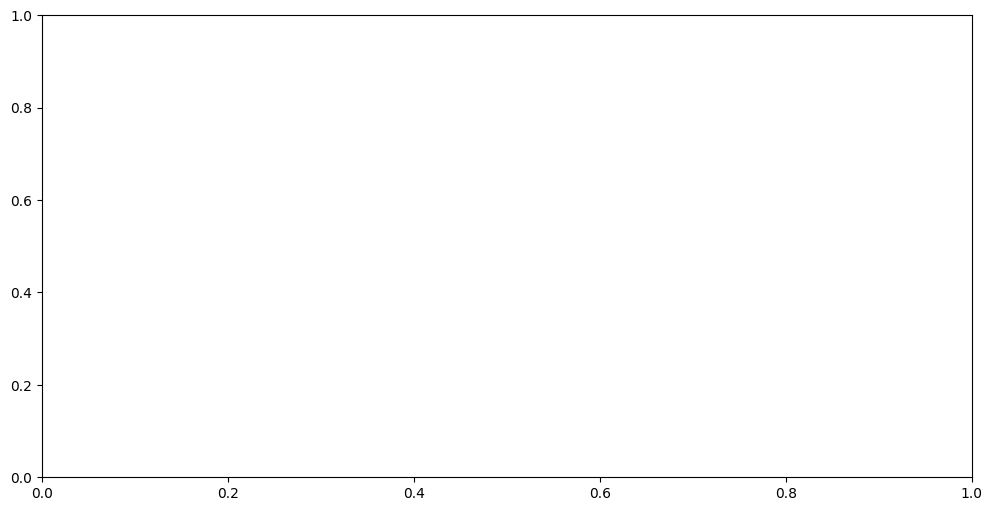

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue['Existing'], label='Existing Customer Revenue', marker='o')
plt.plot(monthly_revenue.index, monthly_revenue['New'], label='New Customer Revenue', marker='x')
plt.title('Revenue from Existing vs. New Customers Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Interpretations:

1. **Growth of Existing Customer Revenue**: Revenue from existing customers shows a general upward trend over the observed period. This indicates that the firm has successfully increased its revenue from its existing customer base. There are fluctuations in the revenue, with noticeable peaks and valleys, suggesting that there might be seasonal effects or specific events that significantly impact revenue from existing customers. The most significant peak appears near the end of 2017, indicating a particularly successful period.

2. **New Customer Revenue**: Revenue from new customers remains relatively lower compared to that from existing customers throughout the period. However, there is a gradual increase over time, indicating that the firm is attracting new customers and generating additional revenue streams from them. The trend is generally upwards, albeit with smaller fluctuations than those seen in the revenue from existing customers.

3. **Revenue Volatility**: The revenue from existing customers exhibits more volatility than the revenue from new customers. This could be due to a variety of factors, including larger transactions or contract renewals that may occur irregularly throughout the year.

4. **Importance of Existing Customers**: The graph underscores the importance of existing customers as a source of revenue for the firm. It suggests that while new customers contribute to revenue growth, existing customers are the backbone of the firm's financial performance.

5. **Seasonality and Events**: The fluctuations in revenue, especially the sharp peaks and troughs, might indicate the impact of seasonality (such as end-of-year sales) or specific marketing campaigns and events that significantly drive revenue at certain times of the year.

The firm might benefit from focusing on strategies to further increase the engagement and spending of existing customers, given their significant contribution to revenue. Additionally, there is room for growth in attracting more new customers and possibly increasing their initial spending.



In [ ]:
plt.figure(figsize=(12, 6))

monthly_revenue.index = monthly_revenue.index.to_timestamp()

plt.plot(monthly_revenue.index, monthly_revenue['Existing%'], label='Existing Customer Revenue %', marker='o')
plt.plot(monthly_revenue.index, monthly_revenue['New%'], label='New Customer Revenue %', marker='x')


plt.title('Revenue Percentage from Existing vs. New Customers Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue Percentage')

plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Interpretations:
1. **Existing Customers Dominate**: Existing customers consistently contribute much more to revenue than new customers, emphasizing the value of customer retention.
2. **Stable Revenue from Existing**: The revenue share from existing customers is stable, underlining their reliability for steady income.
3. **Increasing Trend in New Customers**: New customers' revenue share shows a slow but positive increase, indicating effective acquisition strategies.
4. **Importance of Balance**: The data underscores the need to balance efforts between retaining existing customers and attracting new ones for sustainable growth.



# **Problem 5**

# 5a. Revenue and customer counts by cohort over time

In [ ]:
cohort_data = df_full
cohort_data

In [ ]:
customer_num = df_raw_c['customer_id'].unique().shape
print(customer_num)

pre_2015_customers = df_raw_c[df_raw_c['cohort_date']<'2014-12-31']['customer_id'].unique().shape[0]
print(pre_2015_customers)

In [ ]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

current_date = datetime(2013, 12, 31)
end_date = datetime(2017, 12, 31)
pre_2015_frac_y = []

# 每次增加一年遍历直到结束时间
while current_date <= end_date:
  # 处理当前日期
  pre_customers = df_full[(df_full['cohort_date']<'2014-12-31') & (df_full['date'] >= current_date)]['customer_id'].unique()
  print(pre_customers)
  pre_2015_frac_y.append(pre_customers.shape[0]/pre_2015_customers)
  current_date = current_date + relativedelta(years=1)

pre_2015_frac_y

In [ ]:
year = np.arange(2015,2019)
plt.plot(year,pre_2015_frac_y,marker = 'o')
plt.xticks(year)

In [ ]:
current_date = datetime(2014, 12, 31)
end_date = datetime(2017, 12, 31)
revenue_fr_2015 = []
pre_customers_spend = df_full[(df_full['cohort_date']<'2014-12-31')]['amount_spent']
pre_customers_return = df_full[(df_full['cohort_date']<'2014-12-31')]['amount_returned']
revenue_2015 = (pre_customers_spend - pre_customers_return).sum()
print(revenue_2015)

while current_date <= end_date:
  pre_customers_spend = df_full[(df_full['cohort_date']<'2014-12-31') & (df_full['date'] > current_date)]['amount_spent']
  pre_customers_return = df_full[(df_full['cohort_date']<'2014-12-31') & (df_full['date'] > current_date)]['amount_returned']
  revenue_from_2015 = (pre_customers_spend - pre_customers_return).sum()
  print(revenue_from_2015)
  revenune_frac = revenue_from_2015/revenue_2015
  revenue_fr_2015.append(revenune_frac)
  current_date = current_date + relativedelta(years=1)

revenue_fr_2015

In [ ]:
year = np.arange(2015,2019)
plt.plot(year,revenue_fr_2015,marker = 'o')
plt.xticks(year)

**Revenue Fraction from Pre-2015 Cohorts:**

- The steadily decreasing revenue contribution from older cohorts implies that Indigo has been successful in continuously acquiring new, valuable customers over time.
- However, it also suggests that customer retention and/or revenue retention from the vintage 2015 and earlier cohorts may be a concern that needs addressing.
- If the pre-2015 revenue fraction continues dropping rapidly, Indigo may become overly reliant on constantly acquiring new customers, which can be costly and unsustainable.

**Customer Fraction from Pre-2015 Cohorts:**

- The declining fraction indicates that pre-2015 customers are gradually churning and being replaced by newer cohorts.
- This could be expected customer attrition, but the pace of decline should be monitored for any abnormal spike in churn rates from those older cohorts.
- Indigo should analyze whether pre-2015 customers exhibit lower engagement, order frequency, or spending compared to newer cohorts, which may explain their reduced overall representation.


# 5b. Customer and revenue retention rates

In [ ]:
# Create date range
current_date = datetime(2013, 12, 31)
end_date = datetime(2018, 12, 31)
total_customers = df_full[df_full['date'] <= end_date]['customer_id'].nunique()

pre_year_customers_proportion = []

# Loop through each year
while current_date <= end_date:
    # 处理当前日期
    pre_customers = df_full[(df_full['date'] >= current_date - relativedelta(years=1)) &
                            (df_full['date'] < current_date)]['customer_id'].nunique()
    pre_year_customers_proportion.append(pre_customers / total_customers)
    current_date = current_date + relativedelta(years=1)

# Plot proportion of customers from previous year each year
year = np.arange(2013, 2019)
plt.plot(year, pre_year_customers_proportion, marker='o')
plt.title('Proportion of Customers from Previous Year Each Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Customers')
plt.xticks(year)
plt.grid(True)
plt.show()

# Create date range
start_year = 2013
end_year = 2018

revenue_fr_previous_customers_proportion = []

# Loop through each year
for year in range(start_year, end_year + 1):
    # Get current year and previous year data
    current_year_data = df_full[df_full['date'].dt.year == year]
    previous_year_data = df_full[df_full['date'].dt.year == year - 1]

    # Calculate total revenue for current year and revenue from previous customers
    total_revenue_current_year = (current_year_data['amount_spent'] - current_year_data['amount_returned']).sum()

    # Determine previous customers
    previous_customers = previous_year_data['customer_id'].unique()

    # Calculate revenue from previous customers for current year
    revenue_from_previous_customers = (current_year_data[current_year_data['customer_id'].isin(previous_customers)]['amount_spent'].sum() -
                                        current_year_data[current_year_data['customer_id'].isin(previous_customers)]['amount_returned'].sum())

    # Calculate proportion of revenue from previous customers and append to list
    revenue_fr_previous_customers_proportion.append(revenue_from_previous_customers / total_revenue_current_year)

# Plot proportion of revenue from previous year customers each year
years = np.arange(start_year, end_year + 1)
plt.plot(years, revenue_fr_previous_customers_proportion, marker='o')
plt.title('Proportion of Revenue from Previous Year Customers Each Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Revenue')
plt.xticks(years)
plt.grid(True)
plt.show()



### Interpretations:

#### Customer Retention Rates:
- The proportion of customers from the previous year steadily increased from around 40% in 2015 to nearly 50% in 2016, indicating a growing number of repeat customers.
- There was a significant increase in the proportion of customers from the previous year in 2017, reaching close to 60%. This suggests improved customer retention strategies or increased customer loyalty during that period.
- However, in 2018, there was a notable decrease in the proportion of customers from the previous year, dropping to approximately 20%. This decline could indicate challenges in retaining customers or changes in market dynamics.

#### Revenue Retention Rates:
- The proportion of revenue from previous year customers remained relatively high, indicating consistent customer loyalty and repeat purchases.
- Despite the sharp decline in the proportion of customers from the previous year in 2018, the proportion of revenue from previous year customers continued to increase. This discrepancy suggests a significant drop in the overall customer retention rate but a higher revenue retention rate.
- One possible explanation could be that although the number of repeat customers decreased, the remaining repeat customers contributed more to the total revenue. This scenario could indicate that while the company struggled to retain a large number of customers, those who remained were more engaged or made higher-value purchases, leading to an increase in revenue retention rate.


In [ ]:
# Check unique values in the gender column
unique_genders = df_full['gender'].unique()

# Create empty dictionaries to store data for each gender
revenue_fr_previous_customers_by_gender = {gender: [] for gender in unique_genders}
customer_count_fr_previous_customers_by_gender = {gender: [] for gender in unique_genders}

# Loop through each year
for year in range(start_year, end_year + 1):
    # Get current year and previous year data
    current_year_data = df_full[df_full['date'].dt.year == year]
    previous_year_data = df_full[df_full['date'].dt.year == year - 1]

    # Calculate total revenue for the current year and revenue from previous customers
    total_revenue_current_year = (current_year_data['amount_spent'] - current_year_data['amount_returned']).sum()

    # Determine previous customers
    previous_customers = previous_year_data['customer_id'].unique()

    # Calculate revenue from previous customers for the current year
    revenue_from_previous_customers = (current_year_data[current_year_data['customer_id'].isin(previous_customers)]['amount_spent'].sum() -
                                        current_year_data[current_year_data['customer_id'].isin(previous_customers)]['amount_returned'].sum())

    # Calculate the proportion of revenue from previous customers and add it to the list
    revenue_fr_previous_customers = revenue_from_previous_customers / total_revenue_current_year

    # Calculate the proportion of the number of previous customers and add it to the list
    if len(df_full[df_full['date'].dt.year == year]['customer_id'].unique()) != 0:
        customer_count_fr_previous_customers = len(previous_customers) / len(df_full[df_full['date'].dt.year == year]['customer_id'].unique())
    else:
        customer_count_fr_previous_customers = 0

    # Group by gender and calculate the proportion of revenue and customer count
    gender_grouped_data = previous_year_data.groupby('gender', dropna=False)['customer_id'].count()
    for gender, count in gender_grouped_data.items():
        if gender in revenue_fr_previous_customers_by_gender:
            revenue_fr_previous_customers_by_gender[gender].append(count * revenue_fr_previous_customers)
            customer_count_fr_previous_customers_by_gender[gender].append(count * customer_count_fr_previous_customers)
        else:
            revenue_fr_previous_customers_by_gender[gender].append(0)
            customer_count_fr_previous_customers_by_gender[gender].append(0)

# Ensure that the lengths of the lists of revenue proportion and customer count proportion for each gender are the same (fill with zeros)
max_len = max(len(lst) for lst in revenue_fr_previous_customers_by_gender.values())
for gender, proportions in revenue_fr_previous_customers_by_gender.items():
    if len(proportions) < max_len:
        revenue_fr_previous_customers_by_gender[gender].extend([0] * (max_len - len(proportions)))

max_len = max(len(lst) for lst in customer_count_fr_previous_customers_by_gender.values())
for gender, proportions in customer_count_fr_previous_customers_by_gender.items():
    if len(proportions) < max_len:
        customer_count_fr_previous_customers_by_gender[gender].extend([0] * (max_len - len(proportions)))

# Plot the proportion of revenue from previous year customers each year
plt.figure(figsize=(10, 6))
for gender, proportions in revenue_fr_previous_customers_by_gender.items():
    plt.plot(range(start_year, end_year + 1), proportions, marker='o', label=gender)
plt.title('Proportion of Revenue from Previous Year Customers Each Year by Gender')
plt.xlabel('Year')
plt.ylabel('Proportion of Revenue')
plt.xticks(range(start_year, end_year + 1))
plt.legend()
plt.grid(True)
plt.show()

# Plot the proportion of customer count from previous year each year
plt.figure(figsize=(10, 6))
for gender, proportions in customer_count_fr_previous_customers_by_gender.items():
    plt.plot(range(start_year, end_year + 1), proportions, marker='o', label=gender)
plt.title('Proportion of Customer Count from Previous Year Each Year by Gender')
plt.xlabel('Year')
plt.ylabel('Proportion of Customer Count')
plt.xticks(range(start_year, end_year + 1))
plt.legend()
plt.grid(True)
plt.show()


### Interpretations:

#### Customer Retention Rates:
- Across all years, the proportion of female customers from the previous year consistently exceeds that of male customers. This indicates a higher level of customer retention among female customers compared to male customers.
- The consistently higher proportion of female customers suggests that the company may have implemented strategies or offered products/services that resonate more with female customers, leading to stronger customer loyalty and retention.

#### Revenue Retention Rates:
- Similarly, in terms of revenue retention rates, the proportion of revenue from female customers from the previous year consistently surpasses that from male customers throughout the years analyzed.
- The higher proportion of revenue from female customers indicates that not only are female customers more likely to return, but they also contribute more significantly to the company's revenue compared to male customers.
- This suggests that targeting and retaining female customers may be more lucrative for the business, and further investment in strategies tailored to female customer preferences could yield even greater revenue retention in the future.


# 5c. Customer quality

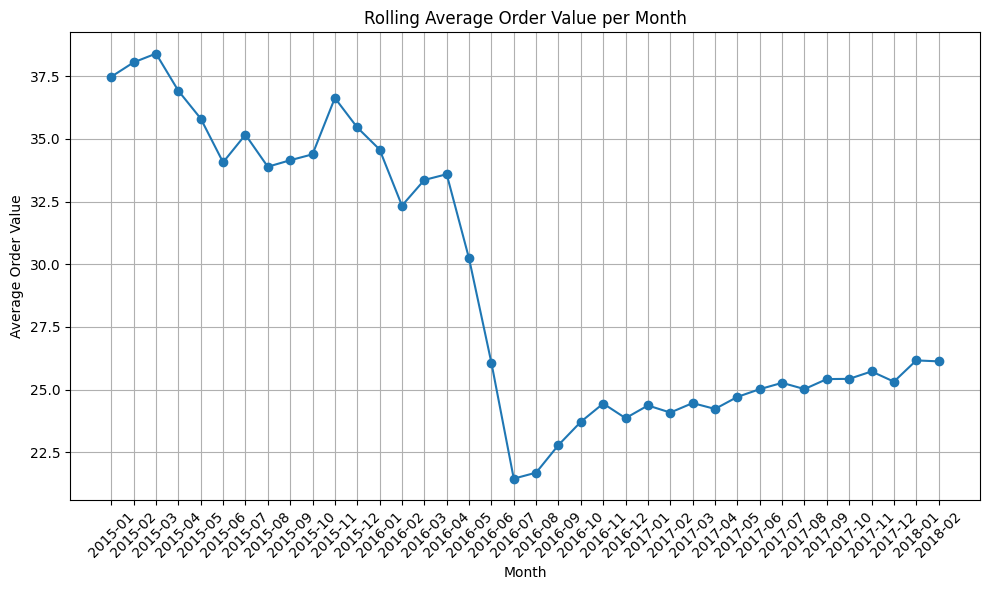

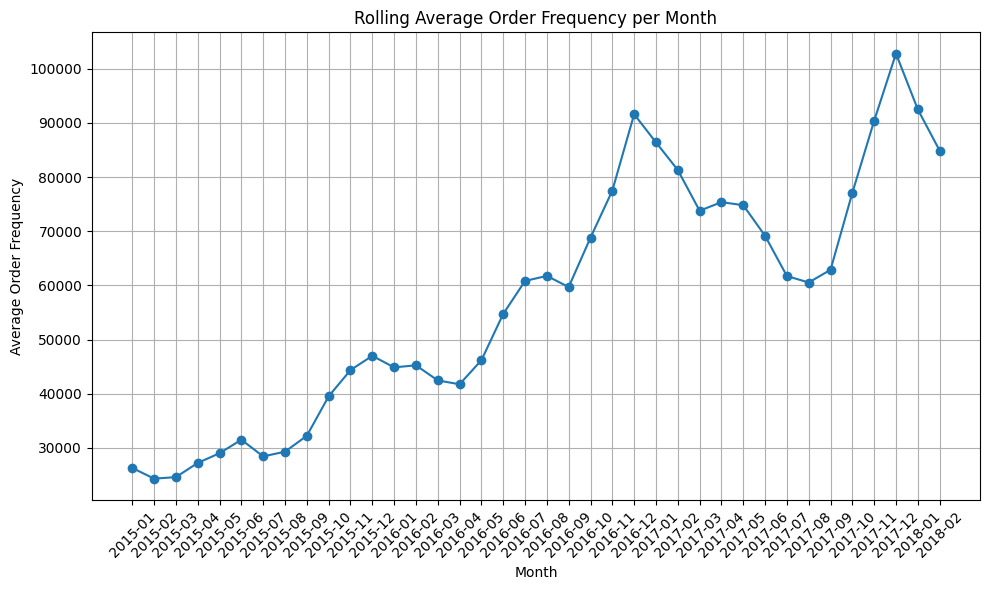

In [17]:
# Grouping data by month
df_full['year_month'] = df_full['date'].dt.to_period('M')
monthly_data = df_full.groupby('year_month')

# Calculating the number of orders and total value for each month
monthly_order_count = monthly_data.size()
monthly_order_value = monthly_data['amount_spent'].sum()

# Calculating the average order value for each month
average_order_value = monthly_order_value / monthly_order_count

# Calculating the average order frequency for each month
average_order_frequency = monthly_order_count

# Remove seasonal effects
# Calculating the rolling average for both average order value and average order frequency
rolling_avg_order_value = average_order_value.rolling(window=3, min_periods=1).mean()
rolling_avg_order_frequency = average_order_frequency.rolling(window=3, min_periods=1).mean()

# Plotting the rolling average order value per month
plt.figure(figsize=(10, 6))
plt.plot(rolling_avg_order_value.index.astype(str), rolling_avg_order_value.values, marker='o', linestyle='-')
plt.title('Rolling Average Order Value per Month')
plt.xlabel('Month')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the rolling average order frequency per month
plt.figure(figsize=(10, 6))
plt.plot(rolling_avg_order_frequency.index.astype(str), rolling_avg_order_frequency.values, marker='o', linestyle='-')
plt.title('Rolling Average Order Frequency per Month')
plt.xlabel('Month')
plt.ylabel('Average Order Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Interpretations:

#### Average Order Value:
- The significant decrease in average order value during the first half of 2016 may indicate various factors affecting customer spending behavior, such as economic conditions, changes in product pricing, or shifts in consumer preferences. This decline suggests that customers were spending less per order during this period, potentially impacting the overall revenue generated from each transaction.
- The subsequent slow climb in average order value suggests a gradual recovery in customer spending habits. It could be indicative of successful strategies implemented by the business to encourage higher-value purchases or improvements in product offerings that resonate better with customers' needs and preferences.

#### Average Order Frequency:
- The consistent upward trend in average order frequency indicates a positive trend in customer engagement and repeat purchases over time. This suggests that customers were making more frequent purchases, which is typically a positive indicator of customer loyalty and satisfaction with the business's products or services.
- The significant decrease in average order frequency during the first half of 2017 followed by a resurgence and peak in November 2017 suggests a period of fluctuation in customer purchasing behavior. This could be attributed to various factors such as seasonal effects, changes in marketing strategies, or external factors influencing consumer spending patterns.


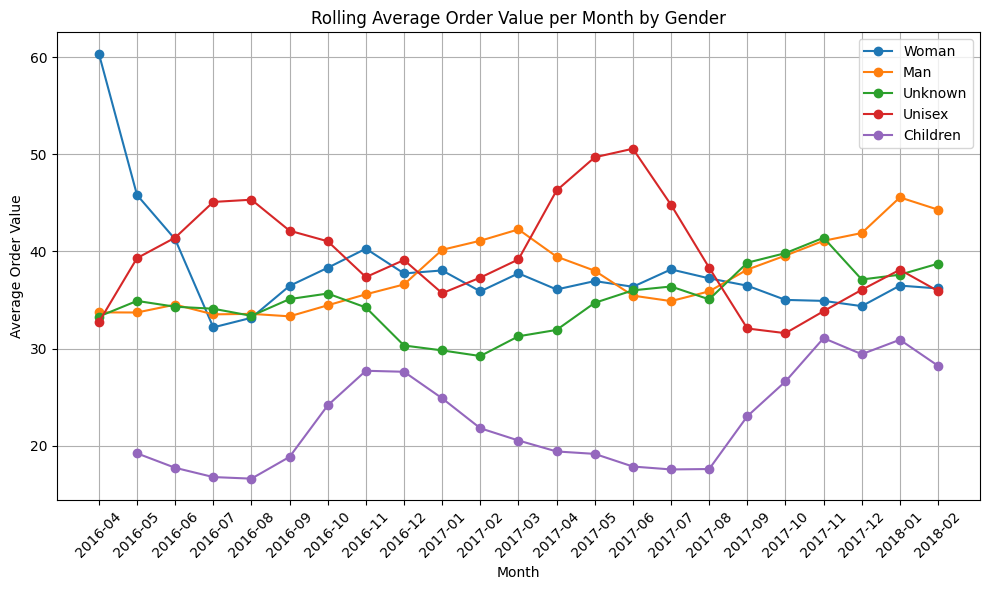

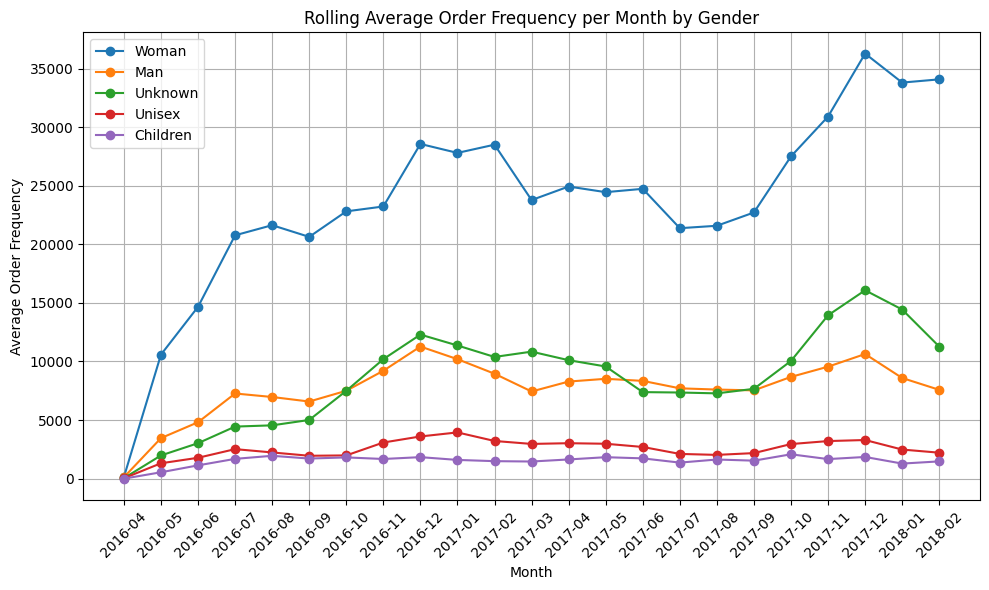

In [19]:
# Filter out rows with NaN values
df_filtered = df_full.dropna(subset=['gender'])

# Group data by month and gender
monthly_gender_data = df_filtered.groupby(['year_month', 'gender'])

# Calculate the number of orders and total value for each month and gender
monthly_gender_order_count = monthly_gender_data.size()
monthly_gender_order_value = monthly_gender_data['amount_spent'].sum()

# Calculate the average order value for each month and gender
average_gender_order_value = monthly_gender_order_value / monthly_gender_order_count

# Calculate the average order frequency for each month and gender
average_gender_order_frequency = monthly_gender_order_count

# Plot the average order value per month by gender
plt.figure(figsize=(10, 6))
for gender in df_filtered['gender'].unique():
    plt.plot(average_gender_order_value.loc[:, gender].rolling(window=3, min_periods=1).mean().index.astype(str),
             average_gender_order_value.loc[:, gender].rolling(window=3, min_periods=1).mean().values,
             marker='o', linestyle='-', label=gender)
plt.title('Rolling Average Order Value per Month by Gender')
plt.xlabel('Month')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the average order frequency per month by gender
plt.figure(figsize=(10, 6))
for gender in df_filtered['gender'].unique():
    plt.plot(average_gender_order_frequency.loc[:, gender].rolling(window=3, min_periods=1).mean().index.astype(str),
             average_gender_order_frequency.loc[:, gender].rolling(window=3, min_periods=1).mean().values,
             marker='o', linestyle='-', label=gender)
plt.title('Rolling Average Order Frequency per Month by Gender')
plt.xlabel('Month')
plt.ylabel('Average Order Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Interpretations:

#### Average Order Value:
- The analysis reveals that there is not a significant difference in the average order value between female and male customers. Both genders seem to spend a similar amount per order on average over the analyzed period.

#### Average Order Frequency:
- However, the data highlights a notable disparity in the average order frequency between female and male customers. Female customers consistently exhibit a much higher order frequency compared to male customers. This suggests that, while male customers may spend similar amounts per order, female customers tend to make purchases more frequently.
- The higher order frequency among female customers could indicate a stronger engagement or preference for the products or services offered by the business. It may also reflect different shopping behaviors or needs between genders, influencing their purchasing patterns.


# 5d. ARPAC

Annual Revenue per Active Customer (ARPAC) for each year:
year
2015    164.494535
2016    177.766185
2017    186.278556
2018    111.404240
dtype: float64


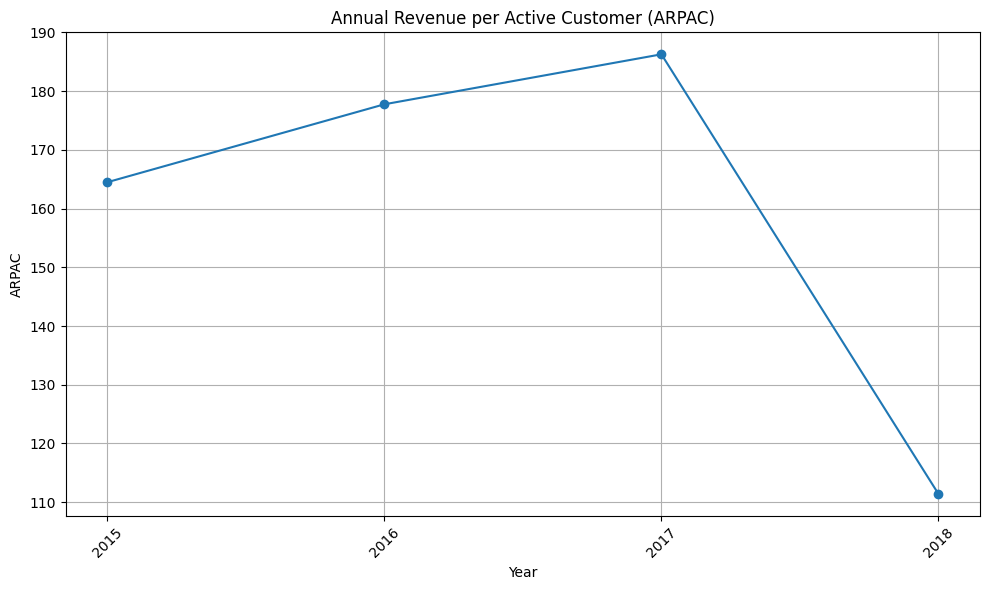

In [20]:
# Grouping data by year
df_full['year'] = df_full['date'].dt.year
yearly_data = df_full.groupby('year')

# Calculating the number of active customers and annual net sales for each year
active_customers_per_year = yearly_data['customer_id'].nunique()
annual_sales_per_year = (yearly_data['amount_spent'].sum() - yearly_data['amount_returned'].sum())

# Calculating the Annual Revenue per Active Customer (ARPAC) for each year
arpac_per_year = annual_sales_per_year / active_customers_per_year

# Printing the results
print("Annual Revenue per Active Customer (ARPAC) for each year:")
print(arpac_per_year)

# Plotting the ARPAC per year
plt.figure(figsize=(10, 6))
plt.plot(arpac_per_year.index.astype(str), arpac_per_year.values, marker='o', linestyle='-')
plt.title('Annual Revenue per Active Customer (ARPAC)')
plt.xlabel('Year')
plt.ylabel('ARPAC')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Interpretations:

- The analysis of the Annual Revenue per Active Customer (ARPAC) reveals a consistent upward trend from 2015 to 2017, with ARPAC surpassing 185 during this period. However, in 2018, there was a sharp decline, with ARPAC dropping to slightly above 110.

- This decline in ARPAC in 2018 could indicate a decrease in average revenue generated from each active customer during that year. There could be several factors contributing to this decline, such as changes in customer behavior, economic conditions, or shifts in marketing strategies.


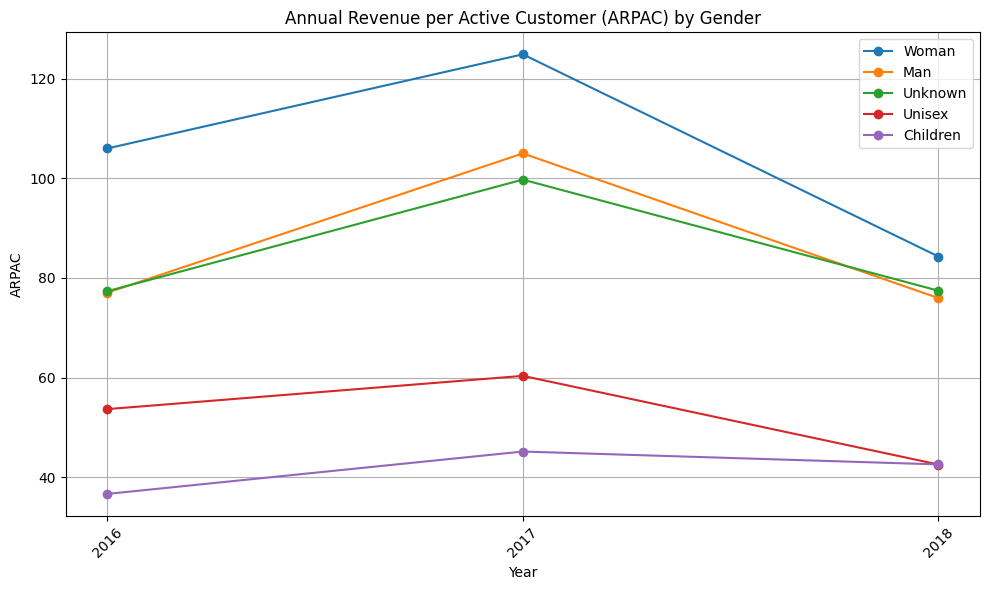

In [22]:
# Filtering out rows with NaN values
df_filtered = df_full.dropna(subset=['gender'])

# Grouping the data by year and gender
yearly_gender_data = df_filtered.groupby(['year', 'gender'])

# Calculating the number of active customers and annual net sales for each year and gender
active_customers_per_year_gender = yearly_gender_data['customer_id'].nunique()
annual_sales_per_year_gender = (yearly_gender_data['amount_spent'].sum() - yearly_gender_data['amount_returned'].sum())

# Calculating the Annual Revenue per Active Customer (ARPAC) for each year and gender
arpac_per_year_gender = annual_sales_per_year_gender / active_customers_per_year_gender

# Plotting the ARPAC for each gender per year
plt.figure(figsize=(10, 6))
for gender in df_filtered['gender'].unique():
    plt.plot(arpac_per_year_gender.loc[:, gender].index.astype(str), arpac_per_year_gender.loc[:, gender].values, marker='o', linestyle='-', label=gender)
plt.title('Annual Revenue per Active Customer (ARPAC) by Gender')
plt.xlabel('Year')
plt.ylabel('ARPAC')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Interpretations:

- The analysis of Annual Revenue per Active Customer (ARPAC) by gender reveals a similar trend across different genders. Initially, ARPAC shows an upward trend followed by a decline over time for all genders. However, throughout the period analyzed, ARPAC for female customers consistently remains the highest compared to other genders.

- The consistent superiority of ARPAC for female customers underscores the importance of understanding and catering to the specific needs and preferences of this demographic.
